#Dùng HOG trích xuất đặc trưng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import hog
import os
import pandas as pd

# Test trích xuất đặc trưng 1 hình

224
(224,)


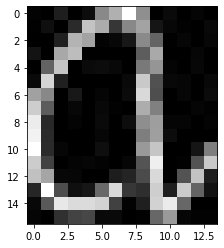

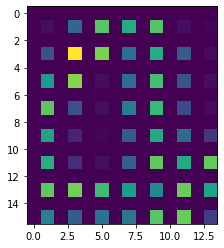

In [ ]:
an_img = Image.open('/content/drive/My Drive/My Data/Do_An_Images/a/picture_2.jpg')
plt.imshow(an_img, cmap = 'gray')
#link_an_img = np.array(link_an_img)
img,im = hog(an_img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=True)
plt.figure()
plt.imshow(im)
print(im.size)
print(np.asarray(im).flatten().shape)

# **Thực hiện trích xuất đặc trưng HOG cho các ảnh**

In [ ]:
FJoin = os.path.join

In [ ]:
def getLink(path):
    ans = []
    label = []
    index = 0
    list_folder = [FJoin(path, f) for f in sorted(os.listdir(path))]
    for f in list_folder:
        list_img = [FJoin(f, img_id) for img_id in sorted(os.listdir(f))]
        for img_link in list_img:
            ans.append(img_link)
            label.append(index)
        index += 1
    return ans, label

In [ ]:
train_path = '/content/drive/MyDrive/My Data/Train'
vali_path = '/content/drive/MyDrive/My Data/Validation'
test_path = '/content/drive/MyDrive/My Data/Test'
link_train, label_train = getLink(train_path)
link_vali, label_vali = getLink(vali_path)
link_test, label_test = getLink(test_path)
print(len(link_train))
print(len(link_vali))
print(len(link_test))

3512


In [ ]:
print(link_test)
print(len(label_test))

['/content/drive/MyDrive/My Data/Test/a/image_500(1).jpg', '/content/drive/MyDrive/My Data/Test/a/image_500.jpg', '/content/drive/MyDrive/My Data/Test/a/image_501.jpg', '/content/drive/MyDrive/My Data/Test/a/image_503.jpg', '/content/drive/MyDrive/My Data/Test/a/image_504.jpg', '/content/drive/MyDrive/My Data/Test/a/image_505.jpg', '/content/drive/MyDrive/My Data/Test/a/image_506(1).jpg', '/content/drive/MyDrive/My Data/Test/a/image_506(2).jpg', '/content/drive/MyDrive/My Data/Test/a/image_507(1).jpg', '/content/drive/MyDrive/My Data/Test/a/image_507(2).jpg', '/content/drive/MyDrive/My Data/Test/a/image_507(3).jpg', '/content/drive/MyDrive/My Data/Test/a/image_508(1).jpg', '/content/drive/MyDrive/My Data/Test/a/image_508(2).jpg', '/content/drive/MyDrive/My Data/Test/a/image_509(1).jpg', '/content/drive/MyDrive/My Data/Test/a/image_509(2).jpg', '/content/drive/MyDrive/My Data/Test/a/image_510(1).jpg', '/content/drive/MyDrive/My Data/Test/a/image_511.jpg', '/content/drive/MyDrive/My Data

In [ ]:
# Hàm trích xuất đặc trưng
def getFeature_Label(link, label):
    list_feature = []
    for img_link in link:
        img = Image.open(img_link).convert('LA')
        img = hog(img, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=False) # hàm lấy feature với các ô block để chuẩn hóa có kích thước 2x2 và mỗi ô trong block có kích thước 2x2 pixel
        list_feature.append(np.asarray(img).ravel())
        #print(np.asarray(img).ravel().shape)
    return np.array(list_feature), np.array(label)

#**Lấy feature các file train, validation, test và lưu vào file.csv**


> Tập train



In [ ]:
X_train, Y_train = getFeature_Label(link_train, label_train)

In [ ]:
len(X_train[0])

1512

In [ ]:
pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/My Data/Save_Data/X_train_HOG.csv', header= None, index=None)
pd.DataFrame(Y_train).to_csv('/content/drive/MyDrive/My Data/Save_Data/Y_train_HOG.csv', header= None, index=None)

> Tập validation

In [ ]:
X_val, Y_val = getFeature_Label(link_vali, label_vali)

In [ ]:
print(X_val[0])

[0.00883103 0.         0.         ... 0.         0.         0.        ]


In [ ]:
pd.DataFrame(X_val).to_csv('/content/drive/MyDrive/My Data/Save_Data/X_val_HOG.csv', header= None, index=None)
pd.DataFrame(Y_val).to_csv('/content/drive/MyDrive/My Data/Save_Data/Y_val_HOG.csv', header= None, index=None)

> Tập test

In [ ]:
X_test, Y_test = getFeature_Label(link_test, label_test)

In [ ]:
print(X_test[0])

[0.00303146 0.         0.         ... 0.34822686 0.         0.        ]


In [ ]:
pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/My Data/Save_Data/X_test_HOG.csv', header= None, index=None)
pd.DataFrame(Y_test).to_csv('/content/drive/MyDrive/My Data/Save_Data/Y_test_HOG.csv', header= None, index=None)